In [4]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.preprocessing import StandardScaler

In [7]:
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
print(df.head())
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


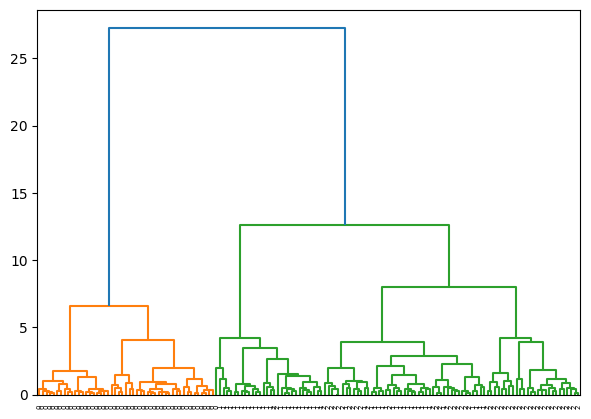

In [9]:
# Perform hierarchical clustering
z = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(7, 5))
dendrogram(z, labels=iris.target)
plt.show()

In [15]:
# Form flat clusters
cluster = fcluster(z, t=3, criterion='maxclust')
df['cluster'] = cluster
df['species'] = iris.target

# Display the clustering result
print(df.groupby(['cluster', 'species']).size())

cluster  species
1        0          49
2        0           1
         1          27
         2           2
3        1          23
         2          48
dtype: int64
